# `ACEpotentials.jl` Tutorial


## Introduction

The `ACEpotentials.jl` documentation (https://acesuit.github.io/ACEpotentials.jl/) contains a number of short, focused tutorials on key topics. This tutorial is longer and has a single narrative. Many `Julia` commands are introduced by example.

### Installing ACEpotentials

`ACEpotentials` version 0.8 and above requires Julia 1.10. 
For detailed installation instructions, see: https://acesuit.github.io/ACEpotentials.jl/dev/gettingstarted/installation/.

Warning: The following installation will take several minutes.

In [1]:
# add and load general packages used in this notebook.
using Pkg
# Pkg.Registry.add("General")  # only needed when installing Julia for the first time
Pkg.activate(".")
Pkg.add(["LaTeXStrings", "MultivariateStats", "Plots", "PrettyTables", 
         "Suppressor", "ExtXYZ", "Unitful", "Distributed"])

# ACEpotentials installation 
using Pkg
Pkg.activate(".")
Pkg.Registry.add(RegistrySpec(url="https://github.com/ACEsuit/ACEregistry"))
# Pkg.add("ACEpotentials")

  Activating project at `~/gits/ACEpotentials.jl/examples/Tutorial`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/gits/ACEpotentials.jl/examples/Tutorial/Project.toml`
  [352459e4] + ExtXYZ v0.2.0
  [b964fa9f] + LaTeXStrings v1.3.1
  [6f286f6a] + MultivariateStats v0.10.3
  [91a5bcdd] + Plots v1.40.8
  [08abe8d2] + PrettyTables v2.3.2
  [fd094767] + Suppressor v0.2.8
  [1986cc42] + Unitful v1.21.0
  [8ba89e20] + Distributed
    Updating `~/gits/ACEpotentials.jl/examples/Tutorial/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [7d9fca2a] + Arpack v0.5.4
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.11
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [8bb1440f] + DelimitedFiles v1.9.1
  [31c24e10] + Distributions v0.25.111
  [460bff9d] + Exceptio

Precompiling project...
  ✓ ACEpotentials
  1 dependency successfully precompiled in 8 seconds. 442 already precompiled.
  Activating project at `~/gits/ACEpotentials.jl/examples/Tutorial`
     Cloning registry from "https://github.com/ACEsuit/ACEregistry"
Registry `ACE` already exists in `~/.julia/registries/ACE`.


Now, let's check the status of the installed projects.

In [2]:
using Pkg
Pkg.status()

Status `~/gits/ACEpotentials.jl/examples/Tutorial/Project.toml`
  [3b96b61c] ACEpotentials v0.8.0-dev `../..`
  [352459e4] ExtXYZ v0.2.0
  [b964fa9f] LaTeXStrings v1.3.1
  [6f286f6a] MultivariateStats v0.10.3
  [91a5bcdd] Plots v1.40.8
  [08abe8d2] PrettyTables v2.3.2
  [fd094767] Suppressor v0.2.8
  [1986cc42] Unitful v1.21.0
  [8ba89e20] Distributed


Import all the packages that we will be using. 

In [3]:
using LaTeXStrings, MultivariateStats, Plots, PrettyTables, Printf, 
      Statistics, Suppressor, ExtXYZ, Unitful 

using ACEpotentials

## Part 1: Basic dataset analysis

`ACEpotentials` provides quick access to several example datasets, which can be useful for testing. The following command lists these datasets. (We expect to expand this list signifcantly; please feel free to suggest additions.)

In [4]:
ACEpotentials.list_example_datasets()

9-element Vector{String}:
 "Si_tiny"
 "TiAl_tiny"
 "TiAl_tutorial"
 "Zuo20_Cu"
 "Zuo20_Ge"
 "Zuo20_Li"
 "Zuo20_Mo"
 "Zuo20_Ni"
 "Zuo20_Si"

We begin by loading the tiny silicon dataset.

In [5]:
Si_tiny_dataset, _, _ = ACEpotentials.example_dataset("Si_tiny");

These data were taken from a larger set published with:

> A. P. Bartók, J. Kermode, N. Bernstein, and G. Csányi, **Machine Learning a General-Purpose Interatomic Potential for Silicon**, Phys. Rev. X 8, 041048 (2018)

To illustrate the procedure for loading extended `xyz` data from a file, we download the larger dataset and load it.

In [6]:
download("https://www.dropbox.com/scl/fi/z6lvcpx3djp775zenz032/Si-PRX-2018.xyz?rlkey=ja5e9z99c3ta1ugra5ayq5lcv&st=cs6g7vbu&dl=1",
         "Si_dataset.xyz");

Si_dataset = ExtXYZ.load("Si_dataset.xyz");


┌ Warning: 'pbc' not contained in dict. Defaulting to all-periodic boundary. 
└ @ ExtXYZ ~/.julia/packages/ExtXYZ/sZmmm/src/atoms.jl:156


In [7]:
# The warning in the last cell refers to the first element, so we remove it. 
Si_isolated = Si_dataset[1] 
deleteat!(Si_dataset, 1);

Next, we assess the dataset sizes.

In [8]:
println("The tiny dataset has ", length(Si_tiny_dataset), " structures.")
println("The large dataset has ", length(Si_dataset), " structures.")

The tiny dataset has 53 structures.
The large dataset has 2474 structures.


Next, we create arrays containing the `config_type` for each structure in the datasets. Afterwards, we count the configurations of each type.

In [9]:
config_types_tiny = [at[:config_type] for at in Si_tiny_dataset]
config_types = [ at[:config_type] for at in Si_dataset]

function count_configs(config_types)
    config_counts = [sum(config_types .== ct) for ct in unique(config_types)]
    config_dict = Dict([ct=>cc for (ct,cc) in zip(unique(config_types), config_counts)])
end;

In [10]:
println("There are ", length(unique(config_types_tiny)), 
        " unique config_types in the tiny dataset:")
display(count_configs(config_types_tiny))

There are 4 unique config_types in the tiny dataset:


Dict{String, Int64} with 4 entries:
  "isolated_atom" => 1
  "dia"           => 25
  "liq"           => 2
  "bt"            => 25

In [11]:
println("There are ", length(unique(config_types)), 
        " unique config_types in the full dataset:")
display(count_configs(config_types))

There are 26 unique config_types in the full dataset:


Dict{String, Int64} with 26 entries:
  "sh"                  => 223
  "vacancy"             => 211
  "surface_110"         => 26
  "sp2"                 => 51
  "fcc"                 => 49
  "bt"                  => 445
  "crack_110_1-10"      => 7
  "dia"                 => 489
  "divacancy"           => 78
  "interstitial"        => 115
  "hcp"                 => 49
  "surface_111_3x3_das" => 1
  "amorph"              => 159
  "decohesion"          => 33
  "111adatom"           => 11
  "sp"                  => 100
  "liq"                 => 76
  "surface_001"         => 29
  "bc8"                 => 49
  "st12"                => 49
  "surface_111"         => 47
  "screw_disloc"        => 19
  "crack_111_1-10"      => 10
  "hex_diamond"         => 49
  "surface_111_pandey"  => 50
  "bcc"                 => 49

Two basic distributions which indicate how well the data fills space are the radial and angular distribution functions. We begin with the radial distribution function, plotting using the `histogram` function in `Plots.jl`. For the RDF we add some vertical lines to indicate the distances and first, second neighbours and so forth to confirm that the peaks are in the right place.

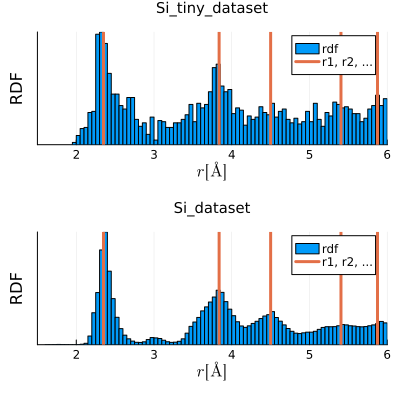

In [12]:
r_cut = 6.0u"Å"
rnn = 2.35

rdf_tiny = ACEpotentials.get_rdf(Si_tiny_dataset, r_cut; rescale = true)
plt_rdf_1 = histogram(rdf_tiny[(:Si, :Si)], bins=150, label = "rdf",
                      title="Si_tiny_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn * [1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

rdf = ACEpotentials.get_rdf(Si_dataset, r_cut; rescale = true);
plt_rdf_2 = histogram(rdf[(:Si, :Si)], bins=150, label = "rdf",
                      title="Si_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn * [1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

plot(plt_rdf_1, plt_rdf_2, layout=(2,1), size=(400,400))

The larger dataset clearly has a better-converged radial distribution function. (But also a much larger ratio between high and low distribution regions.)

For the angular distribution function, we use a cutoff just above the nearest-neighbour distance so we can clearly see the equilibrium bond-angles. In this case, the vertical line indicates the equilibrium bond angle.

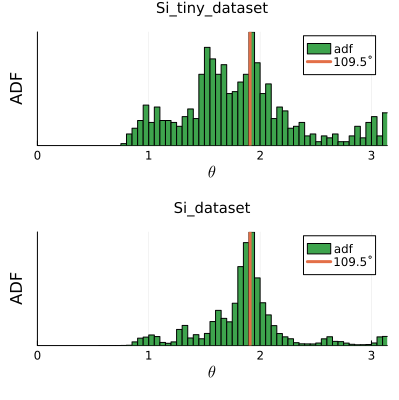

In [13]:
r_cut_adf = 1.25 * rnn * u"Å"
eq_angle = 1.91 # radians
adf_tiny = ACEpotentials.get_adf(Si_tiny_dataset, r_cut_adf);
plt_adf_1 = histogram(adf_tiny, bins=50, label = "adf", yticks = [], c = 3, 
                    title = "Si_tiny_dataset", titlefontsize = 10,
                    xlabel = L"\theta", ylabel = "ADF",
                    xlims = (0, π), size=(400,200), left_margin = 2Plots.mm)
vline!([ eq_angle,], label = "109.5˚", lw=3)

adf = ACEpotentials.get_adf(Si_dataset, r_cut_adf);
plt_adf_2 = histogram(adf, bins=50, label = "adf", yticks = [], c = 3, 
                    title = "Si_dataset", titlefontsize = 10,
                    xlabel = L"\theta", ylabel = "ADF",
                    xlims = (0, π), size=(400,200), left_margin = 2Plots.mm)
vline!([ eq_angle,], label = "109.5˚", lw=3)

plot(plt_adf_1, plt_adf_2, layout=(2,1), size=(400,400))

For later use, we define a function that extracts the energies stored in the silicon datasets.

In [14]:
function extract_energies(dataset)
    energies = []
    for atoms in dataset
        for key in keys(atoms)
            if lowercase(String(key)) == "dft_energy"
                push!(energies, atoms[key] / length(atoms))
            end
        end
    end
    return energies
end;
    
Si_dataset_energies = extract_energies(Si_dataset)
; # the ; is just to suppress ouput

## Part 2: ACE descriptors

An ACE basis specifies a vector of invariant features of atomic environments and can therefore be used as a general descriptor.

Some important parameters include:
* `elements`: list of chemical species, as symbols;
* `order`: correlation/interaction order (body order - 1);
* `totaldegree`: maximum total polynomial degree used for the basis;
* `rcut` : cutoff radius (optional, defaults are provided).

In [15]:
model = ace1_model(elements = [:Si],
                   rcut = 5.5,
                   order = 3,        # body-order - 1
                   totaldegree = 8);

As an example, we compute an averaged structural descriptor for each configuration in the tiny dataset.

In [16]:
descriptors = []
for system in Si_tiny_dataset
    struct_descriptor = sum(site_descriptors(system, model)) / length(system)
    push!(descriptors, struct_descriptor)
end

Next, we extract and plot the principal components of the structural descriptors. Note the segregation by configuration type.

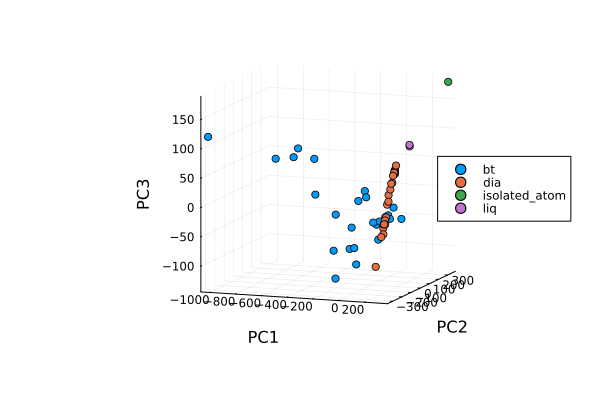

In [17]:
descriptors = reduce(hcat, descriptors)  # convert to matrix
M = fit(PCA, descriptors; maxoutdim=3, pratio=1)
descriptors_trans = transform(M, descriptors)
p = scatter(
     descriptors_trans[1,:], descriptors_trans[2,:], descriptors_trans[3,:],
     marker=:circle, linewidth=0, group=config_types_tiny, legend=:right)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3", camera=(20,10))

Finally, we repeat the procedure for the full dataset. Some clustering is apparent, although the results are a bit harder to interpret.

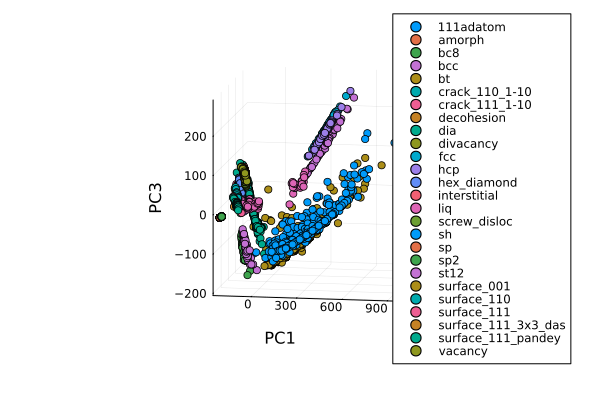

In [18]:
descriptors = []
for system in Si_dataset
    struct_descriptor = sum(site_descriptors(system, model)) / length(system)
    push!(descriptors, struct_descriptor)
end

descriptors = reduce(hcat, descriptors)  # convert to matrix
M = fit(PCA, descriptors; maxoutdim=3, pratio=1)
descriptors_trans = transform(M, descriptors)
p = scatter(
     descriptors_trans[1,:], descriptors_trans[2,:], descriptors_trans[3,:],
     marker=:circle, linewidth=0, group=config_types, legend=:right)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3", camera=(10,10))

## Part 3: Basic model fitting

We begin by defining an (extremely simple) `ACEModel`.

In [19]:
model = ace1_model(
              elements = [:Si,],
              order = 3,
              totaldegree = 8,
              rcut = 5.0,
              Eref = Dict(:Si => -158.54496821))

# `ace1_model` specifies a linear model `model`; because it is linear 
# it is implicitly defined by a basis. In `ACEpotentials`, the size of 
# this basis (= number of parameters) can be checked as follows
@show length_basis(model);

length_basis(model) = 62


Next, we fit determine the model parameters using the tiny dataset and ridge regression via the `QR` solver.

In [20]:
solver = ACEfit.QR(lambda=1e-1)
data_keys = (energy_key = "dft_energy", force_key = "dft_force", virial_key = "dft_virial")
acefit!(Si_tiny_dataset, model;
        solver=solver, data_keys...);

┌───────────────┬──────────┬───────┬────┬─────┬─────┐
│          Type │ #Configs │ #Envs │ #E │  #F │  #V │
├───────────────┼──────────┼───────┼────┼─────┼─────┤
│ isolated_atom │        1 │     1 │  1 │   3 │   0 │
│           dia │       25 │    50 │ 25 │ 150 │ 150 │
│            bt │       25 │    50 │ 25 │ 150 │ 150 │
│           liq │        2 │   128 │  2 │ 384 │  12 │
├───────────────┼──────────┼───────┼────┼─────┼─────┤
│         total │       53 │   229 │ 53 │ 687 │ 312 │
│       missing │        0 │     0 │  0 │   0 │   6 │
└───────────────┴──────────┴───────┴────┴─────┴─────┘


[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (1052, 62).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.


In [21]:
@info("Training Errors")
linear_errors(Si_tiny_dataset, model; data_keys...);

@info("Test Error")
linear_errors(Si_dataset, model; data_keys...);

[ Info: Training Errors
[ Info: RMSE Table


┌───────────────┬─────────┬──────────┬─────────┐
│          Type │ E [meV] │ F [eV/A] │ V [meV] │
├───────────────┼─────────┼──────────┼─────────┤
│ isolated_atom │   0.000 │    0.000 │   0.000 │
│           dia │   9.592 │    0.121 │ 199.238 │
│           liq │   2.850 │    0.373 │  32.882 │
│            bt │  17.643 │    0.213 │ 296.910 │
├───────────────┼─────────┼──────────┼─────────┤
│           set │  13.803 │    0.302 │ 248.009 │
└───────────────┴─────────┴──────────┴─────────┘
┌───────────────┬─────────┬──────────┬─────────┐
│          Type │ E [meV] │ F [eV/A] │ V [meV] │
├───────────────┼─────────┼──────────┼─────────┤
│ isolated_atom │   0.000 │    0.000 │   0.000 │
│           dia │   6.578 │    0.093 │ 153.097 │
│           liq │   2.698 │    0.303 │  27.868 │
│            bt │  14.298 │    0.142 │ 204.181 │
├───────────────┼─────────┼──────────┼─────────┤
│           set │   9.949 │    0.220 │ 172.840 │
└───────────────┴─────────┴──────────┴─────────┘


[ Info: MAE Table
[ Info: Test Error


┌─────────────────────┬──────────┬──────────┬──────────┐
│                Type │  E [meV] │ F [eV/A] │  V [meV] │
├─────────────────────┼──────────┼──────────┼──────────┤
│                  sh │   19.349 │    0.114 │  160.755 │
│             vacancy │   14.717 │    0.220 │  131.088 │
│         surface_110 │  191.234 │    0.527 │    0.000 │
│                 sp2 │  775.091 │    0.421 │    0.000 │
│                 fcc │   77.023 │    0.290 │ 1033.882 │
│                  bt │   25.892 │    0.091 │  180.556 │
│      crack_110_1-10 │  140.298 │    0.589 │  221.179 │
│                 dia │   29.567 │    0.146 │  451.018 │
│           divacancy │   13.355 │    0.275 │    0.000 │
│        interstitial │   14.420 │    0.255 │   84.491 │
│                 hcp │   84.712 │    0.243 │  933.356 │
│ surface_111_3x3_das │  167.500 │    0.481 │    0.000 │
│              amorph │  115.675 │    0.421 │    0.000 │
│          decohesion │   15.482 │    0.345 │  145.196 │
│           111adatom │   53.41

[ Info: RMSE Table
[ Info: MAE Table


Export to LAMMPS is currently not supported. Earlier versions of `ACEpotentials` supported this via 
```
export2lammps("model.yace", model)
```
and some variant will likely be re-instated in the future. 

To save a model for future use within Julia, we can use 

In [22]:
ACEpotentials.save_model(model, "Si_tiny_tutorial.json")

[ Info: saving project
[ Info: Results saved to file: Si_tiny_tutorial.json


We can load the model again as follows. 

In [23]:
m2, raw = ACEpotentials.load_model("Si_tiny_tutorial.json");

LoadError: E0s keys must be the same as the list of elements

Note that this requires us to work in the same (or a compatible) project environment. To guarantee that models can always be reconstructed we save a specification of the entire Julia environment together with the fitted model. This allows us to recover the exact project environment in case it is lost. 

In [ ]:
raw["manifest"]

## Part 4: Committee models

**THIS PART OF THE TUTORIAL HAS NOT BEEN UPDATED TO ≥ 0.8**

`ACEpotentials.jl` can produce committee models using Bayesian linear regression. Such committees provide uncertainty estimates useful for active learning.

Recall our two silicon datasets. We begin by training a (relatively small) model on the tiny version.

Note the use of the `BLR` solver with a nonzero committee size.

In [24]:
model = ace1_model(elements = [:Si,],
                   Eref = [:Si => -158.54496821],
                   order = 3,
                   totaldegree = 12);

acefit!(model, Si_tiny_dataset;
        solver = ACEfit.BLR(committee_size = 30, factorization = :svd),
        energy_key = "dft_energy", force_key = "dft_force",
        verbose = false);

LoadError: MethodError: no method matching acefit!(::ACEpotentials.Models.ACEPotential{ACEpotentials.Models.ACEModel{1, ACEpotentials.Models.SplineRnlrzzBasis{1, ACEpotentials.Models.NormalizedTransform{Float64, ACEpotentials.Models.GeneralizedAgnesiTransform{Float64}}, ACEpotentials.Models.PolyEnvelope2sX{Float64}, 52, Float64}, Polynomials4ML.RealSCWrapper{SpheriCart.SphericalHarmonics{3, :L2, false, Float64}}, ACEpotentials.Models.SparseEquivTensor{Float64, Polynomials4ML.PooledSparseProduct{2}, Polynomials4ML.SparseSymmProdDAG}, ACEpotentials.Models.SplineRnlrzzBasis{1, ACEpotentials.Models.NormalizedTransform{Float64, ACEpotentials.Models.GeneralizedAgnesiTransform{Float64}}, ACEpotentials.Models.ACE1_PolyEnvelope1sR{Float64}, 12, Float64}, ACEpotentials.Models.OneBody{Float64, Unitful.FreeUnits{(), NoDims, nothing}, Unitful.FreeUnits{(Å,), 𝐋, nothing}}}}, ::Vector{Atoms}; solver::ACEfit.BLR, energy_key::String, force_key::String, verbose::Bool)

[0mClosest candidates are:
[0m  acefit!([91m::AbstractArray{<:AtomsBase.AbstractSystem}[39m, ::Any; validation_set, solver, weights, energy_key, force_key, virial_key, smoothness, prior, repulsion_restraint, restraint_weight, export_lammps, export_json, verbose, kwargs...)
[0m[90m   @[39m [35mACEpotentials[39m [90m~/gits/ACEpotentials.jl/src/[39m[90m[4mfit_model.jl:77[24m[39m


Next we define a function which assesses model performance on the full silicon dataset.

In [ ]:
function assess_model(model, train_dataset)

    plot([-164,-158], [-164,-158]; lc=:black, label="")
    
    model_energies = []
    model_std = []
    for atoms in Si_dataset
        ene, co_ene = ACE1.co_energy(model.potential, atoms)
        push!(model_energies, ene/length(atoms))
        push!(model_std, std(co_ene/length(atoms)))
    end
    rmse = sqrt(sum((model_energies-Si_dataset_energies).^2)/length(Si_dataset))
    mae = sum(abs.(model_energies-Si_dataset_energies))/length(Si_dataset)
    scatter!(Si_dataset_energies, model_energies;
             label="full dataset",
             title = @sprintf("Structures Used In Training:  %i out of %i\n", length(train_dataset), length(Si_dataset)) *
                     @sprintf("RMSE (MAE) For Entire Dataset:  %.0f (%.0f) meV/atom", 1000*rmse, 1000*mae),
             titlefontsize = 8,
             yerror = model_std,
             xlabel="Energy [eV/atom]", xlims=(-164,-158),
             ylabel="Model Energy [eV/atom]", ylims=(-164,-158),
             aspect_ratio = :equal, color=1)

    model_energies = [energy(model.potential,atoms)/length(atoms) for atoms in train_dataset]
    scatter!(extract_energies(train_dataset), model_energies;
             label="training set", color=2)
    
end;

Applying this function to our current model yields

In [ ]:
assess_model(model, Si_tiny_dataset)

Clearly there is room to improve: the model-derived RMSE is 280 meV/atom for the full dataset. Moreover, the error bars show the standard deviation of the energies predicted by the commmittee, which are quite high for some data.

Next, we will define a function that augments the tiny dataset by adding structures for which the model is least confident.

In [ ]:
function augment(old_dataset, old_model; num=5)

    new_dataset = deepcopy(old_dataset)
    new_model = deepcopy(old_model)
    
    model_std = []
    for atoms in Si_dataset
        ene, co_ene = ACE1.co_energy(new_model.potential, atoms)
        push!(model_std, std(co_ene/length(atoms)))
    end
    for atoms in Si_dataset[sortperm(model_std; rev=true)[1:num]]
        push!(new_dataset, atoms)
    end
    @suppress acefit!(new_model, new_dataset;
            solver = ACEfit.BLR(committee_size=50, factorization=:svd),
            energy_key = "dft_energy", force_key = "dft_force",
            verbose = false);
    
    return new_dataset, new_model
end;

The following applies this strategy, adding the five structures with the highest committee deviation.

In [ ]:
new_dataset, new_model = augment(Si_tiny_dataset, model; num=5);
assess_model(new_model, new_dataset)

Already, there is notable improvement. The overall errors have dropped, and the predictions for the worst-performing structures are much improved.

Next, we perform four additional augmentation steps, adding twenty structures in total.

In [ ]:
for i in 1:4
    @show i
    new_dataset, new_model = augment(new_dataset, new_model; num=5);
end
assess_model(new_model, new_dataset)

Remarkably, although we are using only a small fraction (~3%) of the full dataset, our model now performs reasonably well.

Further iterations may improve on this result; however, a larger model is necessary to obtain extremely low errors.

**Important:** While this dataset filtering can be useful, the connection with active learning is crucial. Recall that we _did not_ use the reference energies when selecting structures, only the committee deviation.

In [ ]:
GC.gc()

## Part 5: Multiple elements

We briefly demonstrate the syntax for multiple elements, using a TiAl dataset.

In [ ]:
tial_data, _, _ = ACEpotentials.example_dataset("TiAl_tutorial");

The species-dependent RDFs are obtained as

In [ ]:
r_cut = 6.0
rdf = ACEpotentials.get_rdf(tial_data, r_cut * u"Å")
plt_TiTi = histogram(rdf[(:Ti, :Ti)], bins=100, xlabel = "", c = 1,  
         ylabel = "RDF - TiTi", label = "", yticks = [], xlims = (0, r_cut) )
plt_TiAl = histogram(rdf[(:Ti, :Ti)], bins=100, xlabel = "", c = 2, 
         ylabel = "RDF - TiAl", label = "", yticks = [], xlims = (0, r_cut) )
plt_AlAl = histogram(rdf[(:Al, :Al)], bins=100, xlabel = L"r [\AA]", c = 3, 
         ylabel = "RDF - AlAl", label = "", yticks = [], xlims = (0, r_cut), )
plot(plt_TiTi, plt_TiAl, plt_AlAl, layout = (3,1), size = (500, 500), left_margin = 6Plots.mm)

An `ace1_model` is defined as

In [ ]:
model = ace1_model(elements = [:Ti, :Al],
                   order = 3,
                   totaldegree = 6,
                   rcut = 5.5,
                   Eref = Dict(:Ti => -1586.0195, :Al => -105.5954))
@show length_basis(model);

and it is fit in the same manner.

In [ ]:
acefit!(tial_data[1:5:end], model);
linear_errors(tial_data[1:5:end], model);

## Part 6: Recreate data from the ACEpotentials.jl paper

The ACEpotentials paper (https://arxiv.org/abs/2309.03161) includes comparisons with results from

> Y. Zuo, C. Chen, X. Li, Z. Deng, Y. Chen, J. Behler, G. Csányi, A. V. Shapeev, A. P. Thompson, M. A. Wood, and S. P. Ong, **Performance and cost assessment of machine learning interatomic potentials**, J. Chem. Phys. A 124, 731 (2020).

This section can be used to reproduce those results (within the new version of ACEpotentials which is close to but not 100% backward compatible).

Because the assembly of the entire design matrix is a little more time-consuming, it is useful to setup some additional processes. 

In [ ]:
using Distributed
addprocs(10, exeflags="--project=$(Base.active_project())")
@everywhere using ACEpotentials

In [ ]:
### Choose elements to include
#elements = [:Ni, :Cu, :Li, :Mo, :Si, :Ge]
elements = [:Ni, :Cu]

### Choose a model size
totaldegree = [ 20, 16, 12 ]  # small model: ~ 300  basis functions
#totaldegree = [ 25, 21, 17 ]  # large model: ~ 1000 basis functions              

errors = Dict("E" => Dict(), "F" => Dict())

for element in elements 

    # load the dataset
    @info("---------- loading $(element) dataset ----------")
    train, test, _ = ACEpotentials.example_dataset("Zuo20_$element")
    # specify the model
    model = ace1_model(elements = [element], order = 3, totaldegree = totaldegree)
    @info("$element model length: $(length_basis(model))")
    # train the model 
    acefit!(train, model, solver = ACEfit.BLR(; factorization = :svd))
    # compute and store errors
    err  = linear_errors(test,  model)
    errors["E"][element] = err["mae"]["set"]["E"] * 1000
    errors["F"][element] = err["mae"]["set"]["F"]

end

In [ ]:
# kill all the additional processes again
rmprocs(2:nprocs())

Finally, create the tables.

In [ ]:
header = ([ "", "ACE", "GAP", "MTP"])

# create energy table
e_table_gap = Dict(
    :Ni => 0.42, :Cu => 0.46, :Li => 0.49,
    :Mo => 2.24, :Si => 2.91, :Ge => 2.06)
e_table_mtp = Dict(
    :Ni => 0.48, :Cu => 0.41, :Li => 0.49,
    :Mo => 2.83, :Si => 2.21, :Ge => 1.79)
e_table = hcat(
    string.(elements),
    [round(errors["E"][element], digits=3) for element in elements],
    [e_table_gap[element] for element in elements],
    [e_table_mtp[element] for element in elements])
println("Energy Error")
pretty_table(e_table; header = header)
     
# create force table
f_table_gap = Dict(
    :Ni => 0.02, :Cu => 0.01, :Li => 0.01,
    :Mo => 0.09, :Si => 0.07, :Ge => 0.05)
f_table_mtp = Dict(
    :Ni => 0.01, :Cu => 0.01, :Li => 0.01,
    :Mo => 0.09, :Si => 0.06, :Ge => 0.05)
f_table = hcat(
    string.(elements),
    [round(errors["F"][element], digits=3) for element in elements], 
    [f_table_gap[element] for element in elements],
    [f_table_mtp[element] for element in elements])
println("Force Error")
pretty_table(f_table; header = header)

## Part 7: Next steps

* Review tutorials from ACEpotentials documentation: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/
* Parallel fitting: https://acesuit.github.io/ACEpotentials.jl/dev/gettingstarted/parallel-fitting/
* Use an `ACEpotentials.jl` potential with ASE: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/python_ase/
* Install LAMMPS with ACEpotentials patch: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/lammps/